In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import re

In [15]:
# logfile = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_dora_4bit.log"
# logfile2 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_dora_4_2bit.log"
# logfile3 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_dora_4bit_ln.log"
# logfile4 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_4bit_ln.log"
# logfile5 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_dora_4_2bit_ln.log"
# logfile6 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_4_dora_2bit.log"
# logfile7 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_4_dora_2bit_ln.log"
# logfile8 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_4_hqq_2bit_ln.log"

logfile = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_dora_4_2bit_lora_rank-256-base_lr-5e-5-lr_div_factor-10-train_layernorms-true-block-influence.log"
logfile2 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_dora_4_2bit_lora_rank-256-base_lr-5e-5-lr_div_factor-10-train_layernorms-true-loftq-block-influence.log"
logfile3 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_dora_4_2bit_lora_rank-256-base_lr-5e-5-lr_div_factor-10-train_layernorms-true-loftq.log"
logfile4 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_dora_4_2bit_lora_rank-256-base_lr-5e-5-lr_div_factor-10-train_layernorms-true.log"
logfile5 = "/workspace/git/fsdp_qlora/experiments/llama_large/logs/llama_3_1_8b_hqq_dora_4bit.log"

In [16]:
logs = Path(logfile).read_text().split("\n")
logs2 = Path(logfile2).read_text().split("\n")
logs3 = Path(logfile3).read_text().split("\n")
logs4 = Path(logfile4).read_text().split("\n")
logs5 = Path(logfile5).read_text().split("\n")
# logs6 = Path(logfile6).read_text().split("\n")
# logs7 = Path(logfile7).read_text().split("\n")
# logs8 = Path(logfile8).read_text().split("\n")

In [17]:
def extract_loss(l):
	match = re.search(r'Loss\s+([0-9.]+)', l)
	loss_value = match.group(1)
	return loss_value

In [18]:
losses = [float(extract_loss(l)) for l in logs if "Loss" in l][50:]
losses2 = [float(extract_loss(l)) for l in logs2 if "Loss" in l][50:]
losses3 = [float(extract_loss(l)) for l in logs3 if "Loss" in l][50:]
losses4 = [float(extract_loss(l)) for l in logs4 if "Loss" in l][50:]
losses5 = [float(extract_loss(l)) for l in logs5 if "Loss" in l][50:]
# losses6 = [float(extract_loss(l)) for l in logs6 if "Loss" in l][50:]
# losses7 = [float(extract_loss(l)) for l in logs7 if "Loss" in l][50:]
# losses8 = [float(extract_loss(l)) for l in logs8 if "Loss" in l][50:]

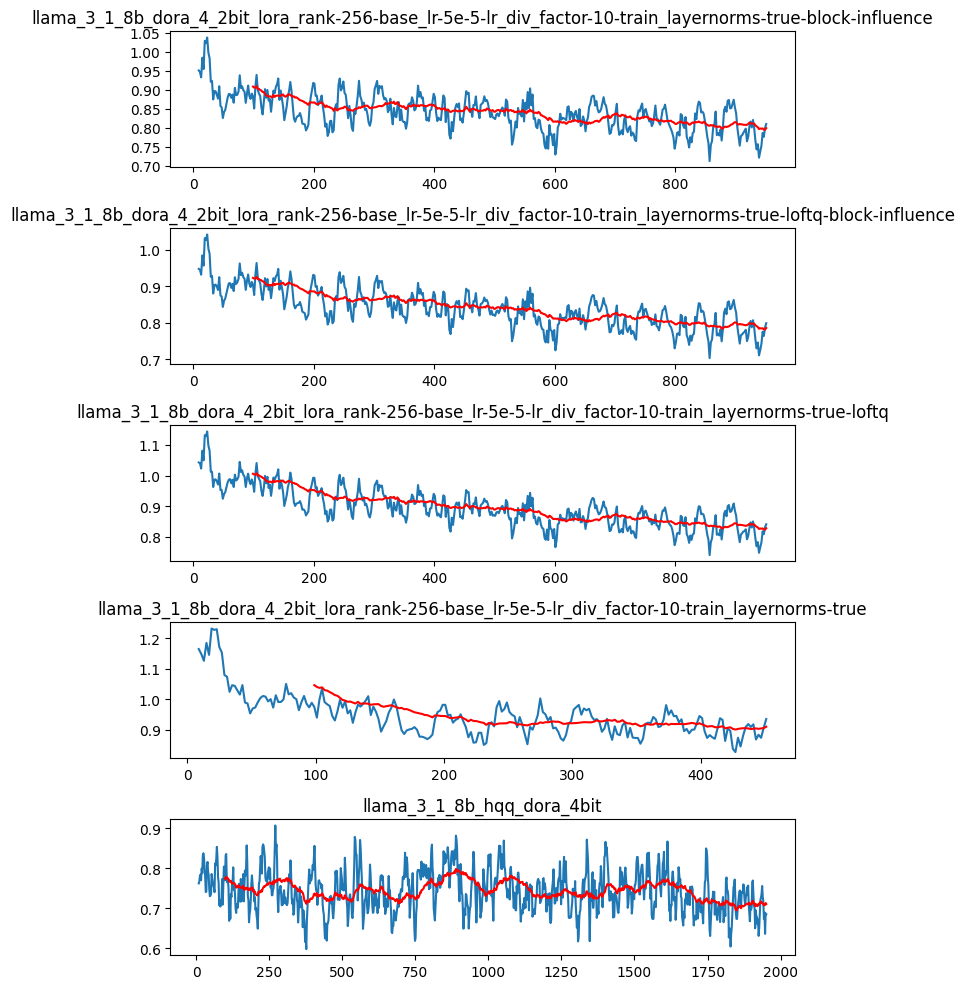

In [20]:
import matplotlib.pyplot as plt
# pd.Series(losses).plot()
# smooth the plot
# pd.Series(losses).rolling(100).mean().plot()
# smooth plot all logs in different figures
fix, axes = plt.subplots(5, 1, figsize=(7, 10))

# show 0,0.25,0.5,0.75,1,... in y axis
axes[0].yaxis.set_major_locator(plt.MultipleLocator(0.05))
axes[1].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axes[2].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axes[3].yaxis.set_major_locator(plt.MultipleLocator(0.1))
axes[4].yaxis.set_major_locator(plt.MultipleLocator(0.1))
# axes[5].yaxis.set_major_locator(plt.MultipleLocator(0.1))
# axes[6].yaxis.set_major_locator(plt.MultipleLocator(0.1))
# axes[7].yaxis.set_major_locator(plt.MultipleLocator(0.1))

pd.Series(losses).rolling(10).mean().plot(ax=axes[0])
pd.Series(losses2).rolling(10).mean().plot(ax=axes[1])
pd.Series(losses3).rolling(10).mean().plot(ax=axes[2])
pd.Series(losses4).rolling(10).mean().plot(ax=axes[3])
pd.Series(losses5).rolling(10).mean().plot(ax=axes[4])
# pd.Series(losses6).rolling(10).mean().plot(ax=axes[5])
# pd.Series(losses7).rolling(10).mean().plot(ax=axes[6])
# pd.Series(losses8).rolling(10).mean().plot(ax=axes[7])


# fit a red regression line
pd.Series(losses).rolling(100).mean().plot(ax=axes[0], color='red')
pd.Series(losses2).rolling(100).mean().plot(ax=axes[1], color='red')
pd.Series(losses3).rolling(100).mean().plot(ax=axes[2], color='red')
pd.Series(losses4).rolling(100).mean().plot(ax=axes[3], color='red')
pd.Series(losses5).rolling(100).mean().plot(ax=axes[4], color='red')
# pd.Series(losses6).rolling(100).mean().plot(ax=axes[5], color='red')
# pd.Series(losses7).rolling(100).mean().plot(ax=axes[6], color='red')
# pd.Series(losses8).rolling(100).mean().plot(ax=axes[7], color='red')

# add title to each plot
axes[0].set_title(Path(logfile).stem)
axes[1].set_title(Path(logfile2).stem)
axes[2].set_title(Path(logfile3).stem)
axes[3].set_title(Path(logfile4).stem)
axes[4].set_title(Path(logfile5).stem)
# axes[5].set_title(Path(logfile6).stem)
# axes[6].set_title(Path(logfile7).stem)
# axes[7].set_title(Path(logfile8).stem)

# add some space between plots
plt.tight_layout()

In [17]:
from datasets import load_from_disk
from transformers import AutoTokenizer

In [19]:
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

In [11]:
ds = load_from_disk("/workspace/data/llama_large_mix_dataset_v0_1536")

In [14]:
print(ds['input_text'][10])

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

You are a helpful AI assistant.<|eot_id|><|start_header_id|>user<|end_header_id|>

Provide the best response to a given instruction. Follow the following steps to craft your response:
1. reason about the given instruction
2. provide a high-quality solution
3. offer a concise explanation
4. write tests to verify the correctness your solution

## Example 1
### Instruction
Develop a Python function `ceil_divide_without_div` that computes the ceiling of `n / 2**b` without using division, floating-point operations, built-in functions like `math.ceil`, or converting it into computing the floor. Instead, use bit manipulation to achieve the result. You write assertions to ensure both `n` and `b` are non-negative integers.

### Response
[Reasoning]
We can leverage the properties of bitwise operations to develop a Python function that computes the ceiling of `n / 2**b` without using division, floating-point operations, or any built-in 

In [15]:
print(ds['output_text'][10])

Here is the implementation of the function using the `socket` module:

```python
import socket

def convert_ipv4_to_32bit_unsigned_int(ip_address: str) -> bytes:
    ip_bytes = socket.inet_aton(ip_address)
    ip_int = int.from_bytes(ip_bytes, byteorder='big')

    return ip_int
```

To test the function, you can use the following code snippet:

```python
import struct

ip_int = convert_ipv4_to_32bit_unsigned_int('192.168.1.1')
assert ip_int == 3232235777
assert struct.pack('!I', ip_int) == b'\xc0\xa8\x01\x01'
```


In [23]:
print(tokenizer.apply_chat_template([{'role':'user', 'content':'hello'}], tokenize=False))

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 Jul 2024

<|eot_id|><|start_header_id|>user<|end_header_id|>

hello<|eot_id|>
